In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

%matplotlib inline 
print("Done")

Done


In [2]:
# load the data 
url = "../datasets/ICF_data/IPL Ball-by-Ball 2008-2020.csv"
url2 = "../datasets/ICF_data/IPL Matches 2008-2020.csv"

match_data = pd.read_csv(url2)
ball_data = pd.read_csv(url)

In [3]:
match_data.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan


In [4]:
ball_data.head(3)

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


In [5]:
# check the shape 
match_data.shape

(816, 17)

In [6]:
ball_data.shape

(193468, 18)

## check for null values 

In [7]:
ball_data.isnull().sum()

id                       0
inning                   0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
batsman_runs             0
extra_runs               0
total_runs               0
non_boundary             0
is_wicket                0
dismissal_kind      183973
player_dismissed    183973
fielder             186684
extras_type         183235
batting_team             0
bowling_team           191
dtype: int64

In [8]:
# shows the columns with null values

In [9]:
match_data.isnull().sum()

id                   0
city                13
date                 0
player_of_match      4
venue                0
neutral_venue        0
team1                0
team2                0
toss_winner          0
toss_decision        0
winner               4
result               4
result_margin       17
eliminator           4
method             797
umpire1              0
umpire2              0
dtype: int64

In [10]:
# lots of null values are present in the ball data 

In [11]:
# we can delete the affected columns entirely or rows 

In [12]:
match_data.columns

Index(['id', 'city', 'date', 'player_of_match', 'venue', 'neutral_venue',
       'team1', 'team2', 'toss_winner', 'toss_decision', 'winner', 'result',
       'result_margin', 'eliminator', 'method', 'umpire1', 'umpire2'],
      dtype='object')

In [13]:
ball_data.columns

Index(['id', 'inning', 'over', 'ball', 'batsman', 'non_striker', 'bowler',
       'batsman_runs', 'extra_runs', 'total_runs', 'non_boundary', 'is_wicket',
       'dismissal_kind', 'player_dismissed', 'fielder', 'extras_type',
       'batting_team', 'bowling_team'],
      dtype='object')

In [14]:
print('matches played so far:', match_data.shape[0])
print('\n Cities where matches are played', match_data['city'].unique())
print('\n Teams participated:', match_data['team1'].unique())

matches played so far: 816

 Cities where matches are played ['Bangalore' 'Chandigarh' 'Delhi' 'Mumbai' 'Kolkata' 'Jaipur' 'Hyderabad'
 'Chennai' 'Cape Town' 'Port Elizabeth' 'Durban' 'Centurion' 'East London'
 'Johannesburg' 'Kimberley' 'Bloemfontein' 'Ahmedabad' 'Cuttack' 'Nagpur'
 'Dharamsala' 'Kochi' 'Indore' 'Visakhapatnam' 'Pune' 'Raipur' 'Ranchi'
 'Abu Dhabi' nan 'Rajkot' 'Kanpur' 'Bengaluru' 'Dubai' 'Sharjah']

 Teams participated: ['Royal Challengers Bangalore' 'Kings XI Punjab' 'Delhi Daredevils'
 'Mumbai Indians' 'Kolkata Knight Riders' 'Rajasthan Royals'
 'Deccan Chargers' 'Chennai Super Kings' 'Kochi Tuskers Kerala'
 'Pune Warriors' 'Sunrisers Hyderabad' 'Gujarat Lions'
 'Rising Pune Supergiants' 'Rising Pune Supergiant' 'Delhi Capitals']


### Extract the year value from the data column in match_data 

In [15]:
match_data['Season'] = pd.DatetimeIndex(match_data['date']).year

In [16]:
match_data.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,Season
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,2008
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri,2008
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar,2008
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper,2008
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan,2008


### Total Number of matches played each season from 2008 -2020

In [17]:
# use groupby first 
match_per_season = match_data.groupby(['Season'])

In [18]:
match_per_season.first()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
Season,,,,,,,,,,,,,,,,,
2008,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,D/L,Asad Rauf,RE Koertzen
2009,392181,Cape Town,2009-04-18,SR Tendulkar,Newlands,1,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,field,Mumbai Indians,runs,19.0,N,D/L,BR Doctrove,K Hariharan
2010,419106,Mumbai,2010-03-12,AD Mathews,Dr DY Patil Sports Academy,0,Deccan Chargers,Kolkata Knight Riders,Deccan Chargers,field,Kolkata Knight Riders,runs,11.0,N,None,RE Koertzen,RB Tiffin
2011,501198,Chennai,2011-04-08,S Anirudha,"MA Chidambaram Stadium, Chepauk",0,Chennai Super Kings,Kolkata Knight Riders,Chennai Super Kings,bat,Chennai Super Kings,runs,2.0,N,D/L,BR Doctrove,PR Reiffel
2012,548306,Chennai,2012-04-04,RE Levi,"MA Chidambaram Stadium, Chepauk",0,Chennai Super Kings,Mumbai Indians,Mumbai Indians,field,Mumbai Indians,wickets,8.0,N,None,JD Cloete,SJA Taufel
2013,597998,Kolkata,2013-04-03,SP Narine,Eden Gardens,0,Kolkata Knight Riders,Delhi Daredevils,Kolkata Knight Riders,field,Kolkata Knight Riders,wickets,6.0,N,None,S Ravi,SJA Taufel
2014,729279,Abu Dhabi,2014-04-16,JH Kallis,Sheikh Zayed Stadium,1,Mumbai Indians,Kolkata Knight Riders,Kolkata Knight Riders,bat,Kolkata Knight Riders,runs,41.0,N,D/L,M Erasmus,RK Illingworth
2015,829705,Kolkata,2015-04-08,M Morkel,Eden Gardens,0,Kolkata Knight Riders,Mumbai Indians,Kolkata Knight Riders,field,Kolkata Knight Riders,wickets,7.0,N,D/L,S Ravi,C Shamshuddin
2016,980901,Mumbai,2016-04-09,AM Rahane,Wankhede Stadium,0,Mumbai Indians,Rising Pune Supergiants,Mumbai Indians,bat,Rising Pune Supergiants,wickets,9.0,N,D/L,HDPK Dharmasena,CK Nandan


In [19]:
### All season from 2008 to 2020 and matches played 
match_per_season = match_data.groupby(['Season'])['id'].count().reset_index().rename(columns={'id':'matches'})
match_per_season

,Season,matches
0,2008,58
1,2009,57
2,2010,60
3,2011,73
4,2012,74
5,2013,76
6,2014,60
7,2015,59
8,2016,60
9,2017,59


### draw a bar chart with the above result 

c:\_python3.9.5\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Total Matches Played Each Season')

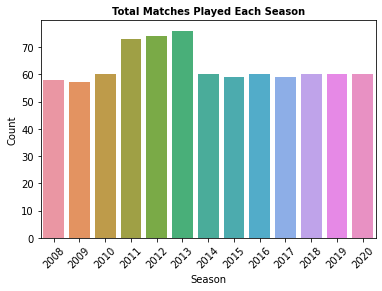

In [20]:
# using seaborn library
data=match_data['Season']
sns.countplot(data)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Season', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.title('Total Matches Played Each Season', fontsize=10, fontweight='bold')

## Merge to tables together for more insights 

In [25]:
# get data for the whole season 
season_data = match_data[['id', 'Season']].merge(ball_data, left_on='id', right_on='id', how='left')

In [26]:
season_data.head()

,id,Season,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,2008,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,2008,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,2008,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,2008,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,2008,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


In [27]:
season_data.shape

(193468, 19)

In [28]:
season_data.columns

Index(['id', 'Season', 'inning', 'over', 'ball', 'batsman', 'non_striker',
       'bowler', 'batsman_runs', 'extra_runs', 'total_runs', 'non_boundary',
       'is_wicket', 'dismissal_kind', 'player_dismissed', 'fielder',
       'extras_type', 'batting_team', 'bowling_team'],
      dtype='object')

### Plot graphs with the season data 

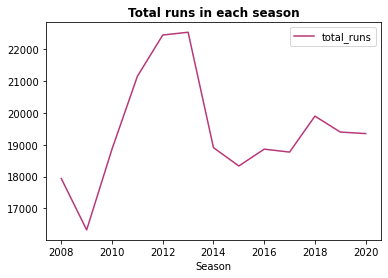

In [29]:
fig, ax = plt.subplots()
season=season_data.groupby(['Season'])['total_runs'].sum().reset_index()
p=season.set_index('Season')
ax.set(facecolor="grey")
ax = plt.axes()
sns.lineplot(data=p, palette="magma")
plt.title('Total runs in each season', fontsize=12, fontweight="bold")
plt.show()

### runs per season 

In [30]:
runs_per_season = pd.concat([match_per_season, season.iloc[:,1]], axis=1)
runs_per_season['Runs scored per match']=runs_per_season['total_runs']/runs_per_season['matches']
runs_per_season.set_index('Season', inplace=True)
runs_per_season

,matches,total_runs,Runs scored per match
Season,,,
2008,58,17937,309.258621
2009,57,16320,286.315789
2010,60,18864,314.400000
2011,73,21154,289.780822
2012,74,22453,303.418919
2013,76,22541,296.592105
2014,60,18909,315.150000
2015,59,18332,310.711864
2016,60,18862,314.366667


### Number of tosses won by each team 

In [31]:
toss=match_data['toss_winner'].value_counts()
toss

Mumbai Indians                 106
Kolkata Knight Riders           98
Chennai Super Kings             97
Rajasthan Royals                87
Royal Challengers Bangalore     87
Kings XI Punjab                 85
Delhi Daredevils                80
Sunrisers Hyderabad             57
Deccan Chargers                 43
Delhi Capitals                  20
Pune Warriors                   20
Gujarat Lions                   15
Kochi Tuskers Kerala             8
Rising Pune Supergiants          7
Rising Pune Supergiant           6
Name: toss_winner, dtype: int64

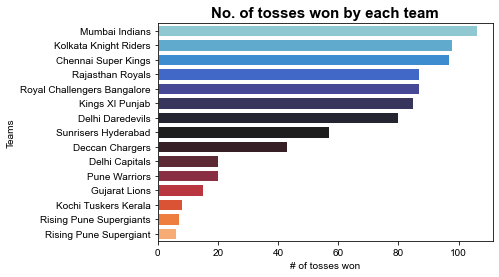

In [32]:
# draw a chart 
ax=plt.axes()
ax.set_facecolor="black"
sns.set(rc={'figure.figsize':(15,10)}, style="darkgrid")
ax.set_title("No. of tosses won by each team", fontsize=15, fontweight='bold')
sns.barplot(y=toss.index, x=toss, orient='h', palette="icefire", saturation=1)
plt.xlabel("# of tosses won")
plt.ylabel('Teams')
plt.show()

In [33]:
# analyse the toss decisions across seasons
# bating or fielding

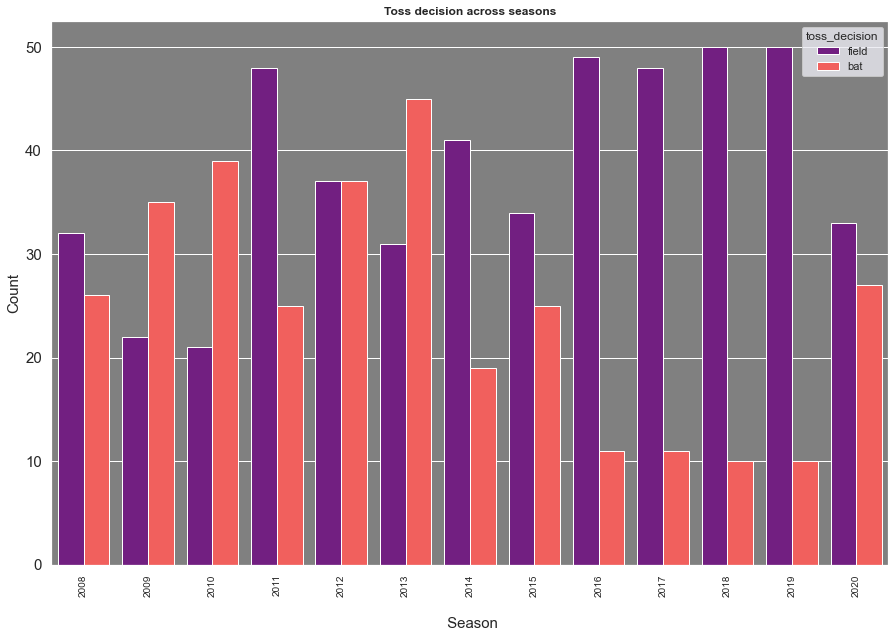

In [34]:
ax =plt.axes()
ax.set(facecolor="grey")
sns.countplot(x='Season', hue='toss_decision', data=match_data, palette="magma", saturation=1)
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=15)
plt.xlabel('\n Season', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Toss decision across seasons', fontsize=12, fontweight='bold')
plt.show()

In [35]:
match_data['result'].value_counts()

wickets    435
runs       364
tie         13
Name: result, dtype: int64